# COVID-19 Spread Dataset: Preprocessing
__AI for Good Hackathon Demo__

## Import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from azureml.core import Workspace, Dataset

import warnings
warnings.filterwarnings('ignore')

## Connect to Azure ML Workspace

In [2]:
subscription_id = '<subscription_id>' #! insert your subscription id here
resource_group = 'ai-in-cloud-workshop-rg'
workspace_name = 'ai-in-cloud-workspace'

workspace = Workspace(subscription_id, resource_group, workspace_name)

## Download Dataset

In [3]:
dataset = Dataset.get_by_name(workspace, name='covid19-spread', version=2)
dataset.description

Dataset structure:

| var\_name                | var\_def                                                                                                                                                                                                  |
| :----------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| iso3c                    | Country name                                                                                                                                                                                              |
| country                  | ISO3c country code as defined by ISO 3166-1 alpha-3                                                                                                                                                       |
| date                     | Calendar date                                                                                                                                                                                             |
| confirmed                | Confirmed Covid-19 cases as reported by JHU CSSE (accumulated)                                                                                                                                            |
| deaths                   | Covid-19-related deaths as reported by JHU CSSE (accumulated)                                                                                                                                             |
| recovered                | Covid-19 recoveries as reported by JHU CSSE (accumulated)                                                                                                                                                 |
| ecdc\_cases              | Covid-19 cases as reported by ECDC (accumulated)                                                                                                                                                          |
| ecdc\_deaths             | Covid-19-related deaths as reported by ECDC (accumulated)                                                                                                                                                 |
| total\_tests             | Accumulated test counts as reported by Our World in Data                                                                                                                                                  |
| tests\_units             | Definition of what constitutes a ‘test’                                                                                                                                                                   |
| soc\_dist                | Number of social distancing measures reported up to date by ACAPS, net of lifted restrictions                                                                                                             |
| mov\_rest                | Number of movement restrictions reported up to date by ACAPS, net of lifted restrictions                                                                                                                  |
| pub\_health              | Number of public health measures reported up to date by ACAPS, net of lifted restrictions                                                                                                                 |
| gov\_soc\_econ           | Number of social and economic measures reported up to date by ACAPS, net of lifted restrictions                                                                                                           |
| lockdown                 | Number of lockdown measures reported up to date by ACAPS, net of lifted restrictions                                                                                                                      |
| apple\_mtr\_driving      | Apple Maps usage for driving directions, as percentage\*100 relative to the baseline of Jan 13, 2020                                                                                                      |
| apple\_mtr\_walking      | Apple Maps usage for walking directions, as percentage\*100 relative to the baseline of Jan 13, 2020                                                                                                      |
| apple\_mtr\_transit      | Apple Maps usage for public transit directions, as percentage\*100 relative to the baseline of Jan 13, 2020                                                                                               |
| gcmr\_retail\_recreation | Google Community Mobility Reports data for the frequency that people visit retail and recreation places expressed as a percentage\*100 change relative to the baseline period Jan 3 - Feb 6, 2020         |
| gcmr\_grocery\_pharmacy  | Google Community Mobility Reports data for the frequency that people visit grocery stores and pharmacies expressed as a percentage\*100 change relative to the baseline period Jan 3 - Feb 6, 2020        |
| gcmr\_parks              | Google Community Mobility Reports data for the frequency that people visit parks expressed as a percentage\*100 change relative to the baseline period Jan 3 - Feb 6, 2020                                |
| gcmr\_transit\_stations  | Google Community Mobility Reports data for the frequency that people visit transit stations expressed as a percentage\*100 change relative to the baseline period Jan 3 - Feb 6, 2020                     |
| gcmr\_workplaces         | Google Community Mobility Reports data for the frequency that people visit workplaces expressed as a percentage\*100 change relative to the baseline period Jan 3 - Feb 6, 2020                           |
| gcmr\_residential        | Google Community Mobility Reports data for the frequency that people visit residential places expressed as a percentage\*100 change relative to the baseline period Jan 3 - Feb 6, 2020                   |
| gtrends\_score           | Google search volume for the term ‘coronavirus’, relative across time with the country maximum scaled to 100                                                                                              |
| gtrends\_country\_score  | Country-level Google search volume for the term ‘coronavirus’ over a period starting Jan 1, 2020, relative across countries with the country having the highest search volume scaled to 100 (time-stable) |
| region                   | Country region as classified by the World Bank (time-stable)                                                                                                                                              |
| income                   | Country income group as classified by the World Bank (time-stable)                                                                                                                                        |
| population               | Country population as reported by the World Bank (original identifier ‘SP.POP.TOTL’, time-stable)                                                                                                         |
| land\_area\_skm          | Country land mass in square kilometers as reported by the World Bank (original identifier ‘AG.LND.TOTL.K2’, time-stable)                                                                                  |
| pop\_density             | Country population density as reported by the World Bank (original identifier ‘EN.POP.DNST’, time-stable)                                                                                                 |
| pop\_largest\_city       | Population in the largest metropolian area of the country as reported by the World Bank (original identifier ‘EN.URB.LCTY’, time-stable)                                                                  |
| life\_expectancy         | Average life expectancy at birth of country citizens in years as reported by the World Bank (original identifier ‘SP.DYN.LE00.IN’, time-stable)                                                           |
| gdp\_capita              | Country gross domestic product per capita, measured in 2010 US-$ as reported by the World Bank (original identifier ‘NY.GDP.PCAP.KD’, time-stable)                                                        |
| timestamp                | Date and time where data has been collected from authoritative sources                                                                                                                                    |

Source: https://github.com/joachim-gassen/tidycovid19/

In [4]:
data = dataset.to_pandas_dataframe()
data.sample(10)

,iso3c,country,date,confirmed,deaths,recovered,ecdc_cases,ecdc_deaths,total_tests,tests_units,...,gtrends_country_score,region,income,population,land_area_skm,pop_density,pop_largest_city,life_expectancy,gdp_capita,timestamp
21878,OMN,Oman,2020-04-05,298.0,2.0,61.0,277.0,2.0,None,None,...,None,Middle East & North Africa,High income,4.829483e+06,309500.0,15.604145,1446563.0,77.633000,15796.773086,2020-06-23 19:19:29
13316,IND,India,2020-03-16,119.0,2.0,13.0,93.0,2.0,None,None,...,43,South Asia,Lower middle income,1.352617e+09,2973190.0,454.938073,28513682.0,69.416000,2100.800780,2020-06-23 19:19:29
5154,CHL,Chile,2020-01-31,0.0,0.0,0.0,NaN,NaN,None,None,...,45,Latin America & Caribbean,High income,1.872916e+07,NaN,25.189446,6680371.0,80.042000,15130.154322,2020-06-23 19:19:29
14970,KAZ,Kazakhstan,2020-03-27,150.0,1.0,3.0,120.0,0.0,15147,tests performed,...,None,Europe & Central Asia,Upper middle income,1.827243e+07,2699700.0,6.768319,1829005.0,73.150000,11168.030760,2020-06-23 19:19:29
22270,PER,Peru,2020-01-26,0.0,0.0,0.0,NaN,NaN,None,None,...,63,Latin America & Caribbean,Upper middle income,3.198926e+07,1280000.0,24.991606,10390607.0,76.516000,6453.560525,2020-06-23 19:19:29
17925,MCO,Monaco,2020-04-23,94.0,4.0,35.0,94.0,3.0,None,None,...,None,Europe & Central Asia,High income,3.868200e+04,2.0,19196.000000,NaN,NaN,195879.637375,2020-06-23 19:19:29
3705,BMU,Bermuda,2020-05-01,NaN,NaN,NaN,114.0,6.0,None,None,...,None,North America,High income,6.397300e+04,NaN,1184.685164,NaN,81.651707,79251.781664,2020-06-23 19:19:29
12274,GUY,Guyana,2020-02-22,0.0,0.0,0.0,NaN,NaN,None,None,...,None,Latin America & Caribbean,Upper middle income,7.790040e+05,196850.0,3.957348,NaN,69.774000,3992.226259,2020-06-23 19:19:29
30591,ZMB,Zambia,2020-03-08,0.0,0.0,0.0,NaN,NaN,None,None,...,None,Sub-Saharan Africa,Lower middle income,1.735182e+07,743390.0,23.341479,2523844.0,63.510000,1672.345428,2020-06-23 19:19:29
3024,BHR,Bahrain,2020-06-01,11871.0,19.0,7070.0,11398.0,19.0,323162,units unclear,...,None,Middle East & North Africa,High income,1.569439e+06,NaN,2017.273700,564631.0,77.163000,21438.409900,2020-06-23 19:19:29


Discover dataset structure:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30853 entries, 0 to 30852
Data columns (total 37 columns):
iso3c                     30853 non-null object
country                   30603 non-null object
date                      30853 non-null datetime64[ns]
confirmed                 28305 non-null float64
deaths                    28305 non-null float64
recovered                 28305 non-null float64
ecdc_cases                22643 non-null float64
ecdc_deaths               22643 non-null float64
total_tests               7303 non-null object
tests_units               7303 non-null object
soc_dist                  27761 non-null float64
mov_rest                  27761 non-null float64
pub_health                27761 non-null float64
gov_soc_econ              27761 non-null float64
lockdown                  27761 non-null float64
apple_mtr_driving         9169 non-null object
apple_mtr_walking         9169 non-null object
apple_mtr_transit         4058 non-null object
gcmr_iso_3166_

## COVID-19 Spread in Russia

Filter by country and sort by date:

In [6]:
data_ru = data[data.iso3c == 'RUS']
data_ru.sort_values(by=['date'], inplace=True)

data_ru[['country', 'date', 'confirmed', 'deaths', 'recovered']].tail(10)

,country,date,confirmed,deaths,recovered
23981,Russia,2020-06-14,528267.0,6938.0,279536.0
23982,Russia,2020-06-15,536484.0,7081.0,284021.0
23983,Russia,2020-06-16,544725.0,7274.0,293780.0
23984,Russia,2020-06-17,552549.0,7468.0,303800.0
23985,Russia,2020-06-18,560321.0,7650.0,313409.0
23986,Russia,2020-06-19,568292.0,7831.0,323851.0
23987,Russia,2020-06-20,576162.0,7992.0,334024.0
23988,Russia,2020-06-21,583879.0,8101.0,339142.0
23989,Russia,2020-06-22,591465.0,8196.0,343847.0
23990,Russia,2020-06-23,NaN,NaN,NaN


### Spread dynamics

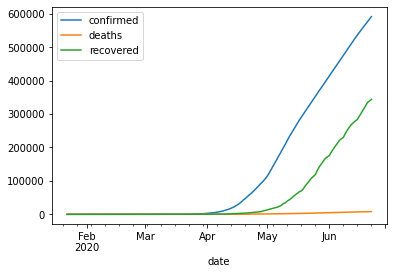

In [7]:
data_ru[['date', 'confirmed', 'deaths', 'recovered']].set_index('date').plot()

### Estimate Correlation

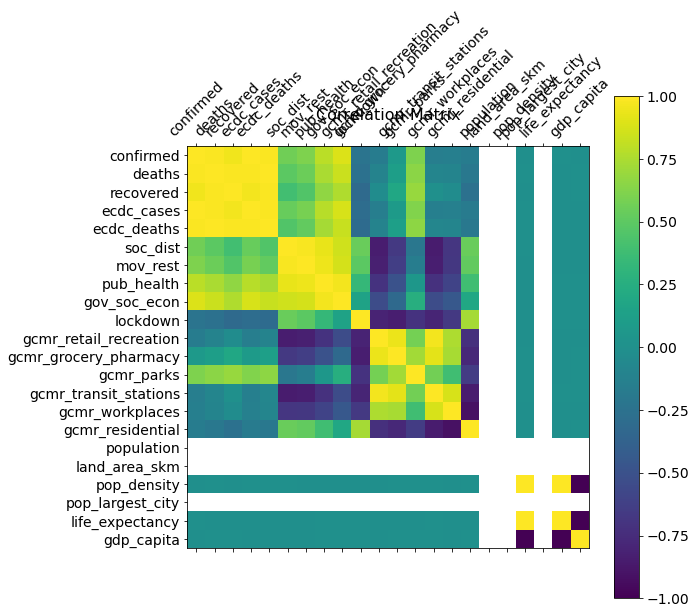

In [8]:
data_ru_numeric = data_ru.select_dtypes(include=np.number)

f = plt.figure(figsize=(9, 9))

plt.matshow(data_ru_numeric.corr(), fignum=f.number)
plt.xticks(range(data_ru_numeric.shape[1]), data_ru_numeric.columns, fontsize=14, rotation=45)
plt.yticks(range(data_ru_numeric.shape[1]), data_ru_numeric.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Feature Engineering

### Set `label` and `previous day cases` values as feature

In [9]:
data_ru['label'] = data.confirmed.shift(-1)

data_ru['confirmed_prev'] = data.confirmed.shift(1)
data_ru['recovered_prev'] = data.recovered.shift(1)
data_ru['deaths_prev'] = data.deaths.shift(1)

data_ru[['date', 'label', 'confirmed', 'confirmed_prev', 'recovered_prev', 'deaths_prev']].tail(7)

,date,label,confirmed,confirmed_prev,recovered_prev,deaths_prev
23984,2020-06-17,560321.0,552549.0,544725.0,293780.0,7274.0
23985,2020-06-18,568292.0,560321.0,552549.0,303800.0,7468.0
23986,2020-06-19,576162.0,568292.0,560321.0,313409.0,7650.0
23987,2020-06-20,583879.0,576162.0,568292.0,323851.0,7831.0
23988,2020-06-21,591465.0,583879.0,576162.0,334024.0,7992.0
23989,2020-06-22,NaN,591465.0,583879.0,339142.0,8101.0
23990,2020-06-23,0.0,NaN,591465.0,343847.0,8196.0


### Set `confirmed` cases with bigger lag

In [10]:
data_ru['confirmed_lag2d'] = data.confirmed.shift(2)
data_ru['confirmed_lag3d'] = data.confirmed.shift(3)
data_ru['confirmed_lag4d'] = data.confirmed.shift(4)
data_ru['confirmed_lag5d'] = data.confirmed.shift(5)

data_ru[['date', 'label', 'confirmed', 'confirmed_prev', 'confirmed_lag2d', 'confirmed_lag3d', 'confirmed_lag4d', 'confirmed_lag5d']].tail(7)

,date,label,confirmed,confirmed_prev,confirmed_lag2d,confirmed_lag3d,confirmed_lag4d,confirmed_lag5d
23984,2020-06-17,560321.0,552549.0,544725.0,536484.0,528267.0,519458.0,510761.0
23985,2020-06-18,568292.0,560321.0,552549.0,544725.0,536484.0,528267.0,519458.0
23986,2020-06-19,576162.0,568292.0,560321.0,552549.0,544725.0,536484.0,528267.0
23987,2020-06-20,583879.0,576162.0,568292.0,560321.0,552549.0,544725.0,536484.0
23988,2020-06-21,591465.0,583879.0,576162.0,568292.0,560321.0,552549.0,544725.0
23989,2020-06-22,NaN,591465.0,583879.0,576162.0,568292.0,560321.0,552549.0
23990,2020-06-23,0.0,NaN,591465.0,583879.0,576162.0,568292.0,560321.0


### Set `diff` and `changes in percents` features

In [11]:
data_ru['confirmed_diff1d'] = data_ru.confirmed.diff()
data_ru['confirmed_rate1d'] = data_ru.confirmed.pct_change()

data_ru[['date', 'confirmed', 'confirmed_prev', 'confirmed_diff1d', 'confirmed_rate1d']].tail(7)

,date,confirmed,confirmed_prev,confirmed_diff1d,confirmed_rate1d
23984,2020-06-17,552549.0,544725.0,7824.0,0.014363
23985,2020-06-18,560321.0,552549.0,7772.0,0.014066
23986,2020-06-19,568292.0,560321.0,7971.0,0.014226
23987,2020-06-20,576162.0,568292.0,7870.0,0.013849
23988,2020-06-21,583879.0,576162.0,7717.0,0.013394
23989,2020-06-22,591465.0,583879.0,7586.0,0.012992
23990,2020-06-23,NaN,591465.0,NaN,0.000000


In [12]:
data_ru.shape

(154, 47)

### Clean Missing Values

### Remove invalid `label` values

In [13]:
data_ru = data_ru[:-2]
data_ru.dropna(subset=['label'], inplace=True)

data_ru.tail(7)

,iso3c,country,date,confirmed,deaths,recovered,ecdc_cases,ecdc_deaths,total_tests,tests_units,...,label,confirmed_prev,recovered_prev,deaths_prev,confirmed_lag2d,confirmed_lag3d,confirmed_lag4d,confirmed_lag5d,confirmed_diff1d,confirmed_rate1d
23982,RUS,Russia,2020-06-15,536484.0,7081.0,284021.0,528964.0,6948.0,15161152,tests performed,...,544725.0,528267.0,279536.0,6938.0,519458.0,510761.0,501800.0,493023.0,8217.0,0.015555
23983,RUS,Russia,2020-06-16,544725.0,7274.0,293780.0,537210.0,7091.0,15395417,tests performed,...,552549.0,536484.0,284021.0,7081.0,528267.0,519458.0,510761.0,501800.0,8241.0,0.015361
23984,RUS,Russia,2020-06-17,552549.0,7468.0,303800.0,545458.0,7284.0,15679724,tests performed,...,560321.0,544725.0,293780.0,7274.0,536484.0,528267.0,519458.0,510761.0,7824.0,0.014363
23985,RUS,Russia,2020-06-18,560321.0,7650.0,313409.0,553301.0,7478.0,15991697,tests performed,...,568292.0,552549.0,303800.0,7468.0,544725.0,536484.0,528267.0,519458.0,7772.0,0.014066
23986,RUS,Russia,2020-06-19,568292.0,7831.0,323851.0,561091.0,7790.0,16321964,tests performed,...,576162.0,560321.0,313409.0,7650.0,552549.0,544725.0,536484.0,528267.0,7971.0,0.014226
23987,RUS,Russia,2020-06-20,576162.0,7992.0,334024.0,569063.0,7972.0,16661287,tests performed,...,583879.0,568292.0,323851.0,7831.0,560321.0,552549.0,544725.0,536484.0,7870.0,0.013849
23988,RUS,Russia,2020-06-21,583879.0,8101.0,339142.0,576952.0,8002.0,16998453,tests performed,...,591465.0,576162.0,334024.0,7992.0,568292.0,560321.0,552549.0,544725.0,7717.0,0.013394


In [14]:
data_ru.shape

(152, 47)

## Upload Dateset to Azure ML

In [16]:
# Store data in parquet format
os.makedirs('buffer', exist_ok=True)
data_ru.to_parquet('buffer/data_ru.parquet')

# Upload data to Azure ML
dataref = workspace.get_default_datastore().upload('buffer')
dataset = Dataset.Tabular.from_parquet_files(path=dataref.path('data_ru.parquet'))

# Register dataset in Azure ML
dataset.register(workspace, name='covid19-spread-russia', create_new_version=True)

print('Completed!')

Uploading an estimated of 1 files
Target already exists. Skipping upload for data_ru.parquet
Uploaded 0 files
Completed!


_Take Care and Stay Healthy!_